# 1. Structure Investigation
Exploring the general shape of the dataset, as well as the data types of your features. <br/>
Explorar la forma general del conjunto de datos, así como los tipos de datos.

In [1146]:
# using pandas and the classic dataset titanic of Kaggle
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
df = pd.read_excel(r'.\train.xlsx')

In [1147]:
# Show size of the dataset
df.shape

(892, 12)

In [1148]:
df.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

In [1149]:
# Count how many times each data type is present in the dataset
# object: 5 Variables Categóricas
# int64: 5 Variables Enteras
# float64: 2 Variables Reales
pd.value_counts(df.dtypes)

object     5
int64      5
float64    2
dtype: int64

In [1150]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 892 entries, 0 to 891
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  892 non-null    int64  
 1   Survived     892 non-null    int64  
 2   Pclass       892 non-null    int64  
 3   Name         892 non-null    object 
 4   Sex          892 non-null    object 
 5   Age          715 non-null    float64
 6   SibSp        892 non-null    int64  
 7   Parch        892 non-null    int64  
 8   Ticket       892 non-null    object 
 9   Fare         892 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     890 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.8+ KB


In [1151]:
df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C
890,891,0,3,"Dooley, Mr. Patrick",male,32.0,0,0,370376,7.7500,NaN,Q


### 1.1. Structure of non-numerical features

Once this is taken care of, we can use the `.describe()` function to investigate how many unique values each non-numerical feature has and with which frequency the most prominent value is present - using the code `df_X.describe(exclude="number")` :

In [1152]:
df.describe(exclude="number")

,Name,Sex,Ticket,Cabin,Embarked
count,892,892,892,204,890
unique,891,2,681,147,3
top,"Dooley, Mr. Patrick",male,1601,C23 C25 C27,S
freq,2,578,7,4,644


4. Name: nombre del pasajero. - EXTRACT INFO (Mr., Miss,..) THEN DISCARD (doesn’t add much value in predicting the target variable).
5. Sex: sexo del pasajero. - 0 NA CATEGORICAL to NUMERICAL 0:male - 1:female
9. Ticket: identificador del billete. - DISCARD (doesn’t add much value in predicting the target variable).
11. Cabin: identificador del camarote asignado al pasajero. - CATEGORICAL to NUMERICAL
12. Embarked: puerto en el que embarcó el pasajero. - CATEGORICAL to NUMERICAL

### 1.2. Structure of numerical features

In [1153]:
df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,892.000000,892.000000,892.000000,715.000000,892.000000,892.000000,892.000000
mean,446.500000,0.383408,2.309417,29.702336,0.522422,0.381166,32.176793
std,257.642517,0.486489,0.835923,14.516576,1.102264,0.805706,49.672283
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.750000,0.000000,2.000000,20.250000,0.000000,0.000000,7.895800
50%,446.500000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,669.250000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,892.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


1. PassengerId: identificador único del pasajero - DISCARD (doesn’t add much value in predicting the target variable).
2. Survived: si el pasajero sobrevivió al naufragio, codificada como 0 (no) y 1 (si).  TARGET VARIABLE
3. Pclass: clase a la que pertenecía el pasajero: 1, 2 o 3.
6. Age: edad del pasajero. - Se observan valores REALES (cuando TODOS deben ser Enteros)
7. SibSp: número de hermanos, hermanas, hermanastros o hermanastras en el barco.
8. Parch: número de padres e hijos en el barco.
10. Fare: precio pagado por el billete.

### Cantidad de valores distintos por variable NUMÉRICA

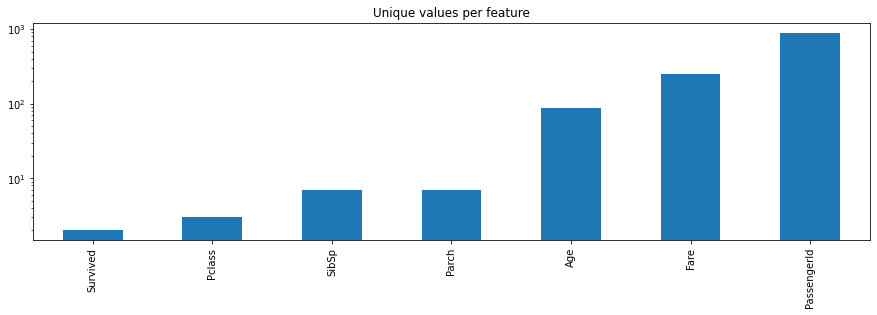

In [1154]:
# For each numerical feature compute number of unique entries
unique_values = df.select_dtypes(include="number").nunique().sort_values()

# Plot information with y-axis in log-scale
unique_values.plot.bar(logy=True, figsize=(15, 4),title="Unique values per feature");

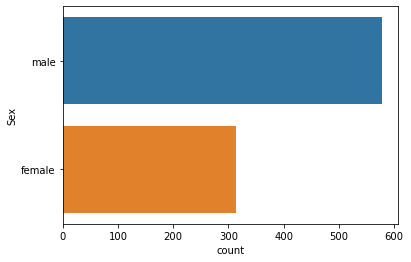

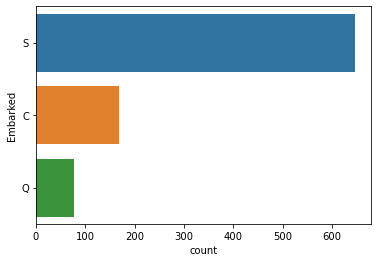

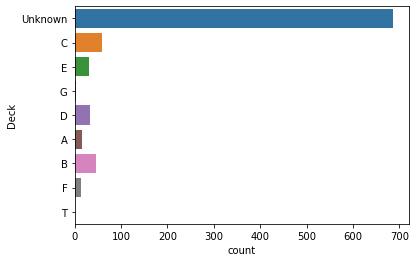

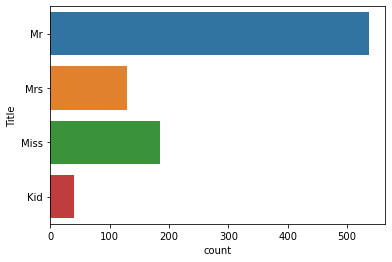

In [1221]:
for column in df.select_dtypes(include='object'):
    if df[column].nunique() < 10:
        sns.countplot(y=column, data=df)
        plt.show()

### Histograma: Rango de valores por variable NUMÉRICA

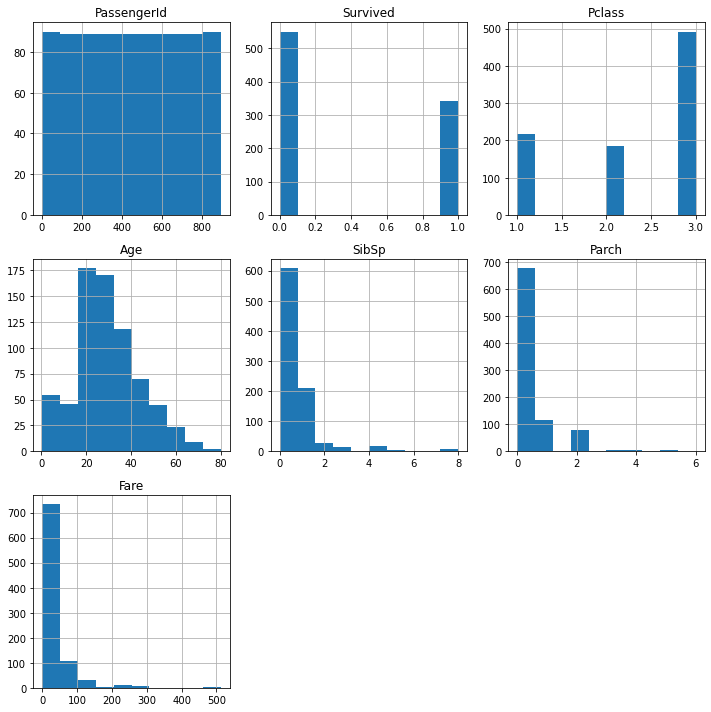

In [1155]:
# Histograma de valores NUMÉRICOS
df.hist(figsize=(10,10)) 
#set a large figsize if you have > 9 variables
plt.tight_layout()
plt.show()

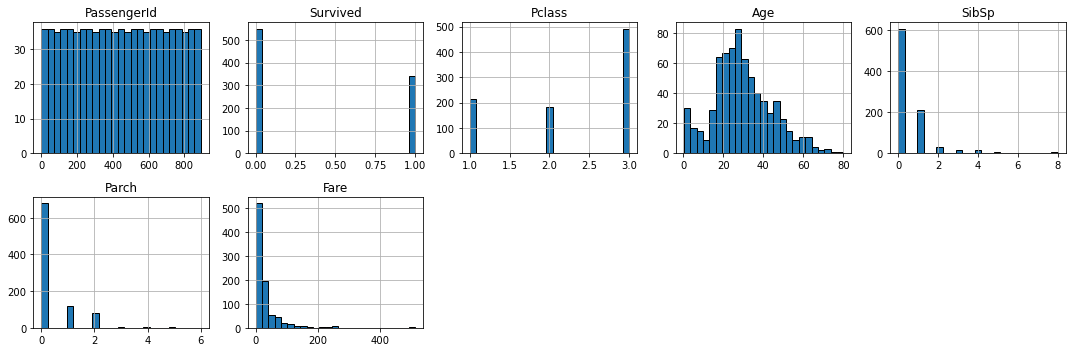

In [1156]:
# Plots the histogram for each numerical feature in a separate subplot
df.hist(bins=25, figsize=(15, 5), layout=(-1, 5), edgecolor="black")
plt.tight_layout();

### 1.3. Conclusions of structure investigation

K

# 2. Quality Investigation
Get a feeling for the general quality of the dataset, with regards to duplicates, missing values and unwanted entries.

### 2.1. Duplicates

In [1157]:
# Check number of duplicates while ignoring the index feature
# Se ha añadido una fila duplicada al dataset original para comprobar la identificación de duplicados
n_duplicates = df.drop(labels=["PassengerId"], axis=1).duplicated().sum()
print(f"You seem to have {n_duplicates} duplicate(s) in your database.")

You seem to have 1 duplicate(s) in your database.


In [1158]:
#  Extract column names of all features, except 'Accident_Index'
columns_to_consider = df.drop(labels=["PassengerId"], axis=1).columns
# Se elimina la fila duplicada, ya disponemos del dataset original
df = df.drop_duplicates(subset=columns_to_consider)
df.shape

(891, 12)

In [1159]:
# Se eliminan variables identificativas (una por fila) que no son predictivas (un valor por feature)
df.drop(['Ticket','PassengerId'], 1, inplace=True) 
df.shape

C:\Users\Carlos\anaconda3\lib\site-packages\pandas\core\frame.py:4163: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(


(891, 10)

### 2.2. Missing values

### 2.2.1. Per sample

In [1160]:
df.isnull().sum()

Survived      0
Pclass        0
Name          0
Sex           0
Age         177
SibSp         0
Parch         0
Fare          0
Cabin       687
Embarked      2
dtype: int64

### Valores missing (todas las variables)

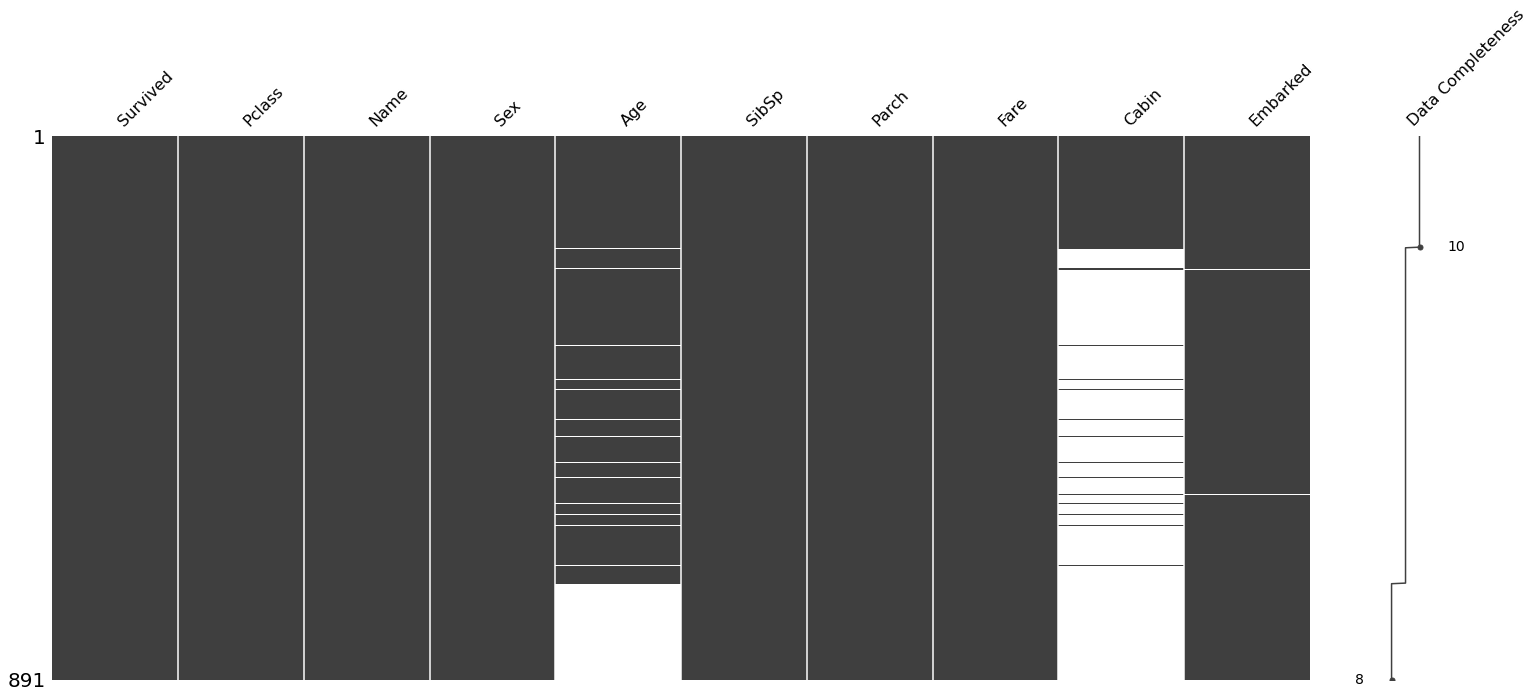

In [1161]:
import missingno as msno
msno.matrix(df, labels=True, sort="descending");

### Valores missing (todas las variables), de menor a mayor

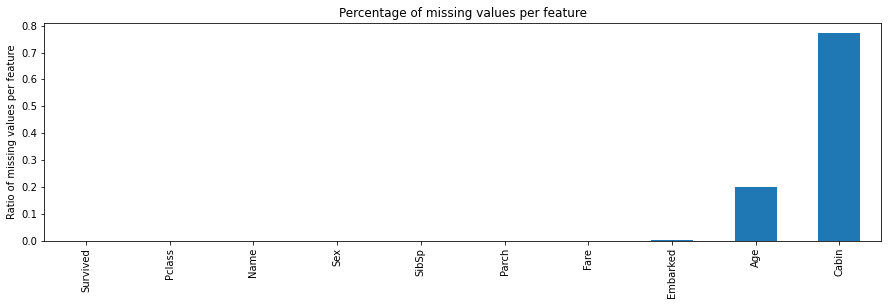

In [1162]:
# Muestra el ratio de valores missing por variable
df.isna().mean().sort_values().plot(
    kind="bar", figsize=(15, 4),
    title="Percentage of missing values per feature",
    ylabel="Ratio of missing values per feature");

In [1163]:
# Función para: 
# - Si no es NaN extraer la primera letra del código de camarote
# - Si es NaN cumplimentar con "Unknown"
def assignDeckValue(CabinCode):
    '''No value="Unknown" else extract the first letter of the cabin
       Value= Fill with th word Unknown'''
    if pd.isnull(CabinCode):
        category = 'Unknown'
    else:
        category = CabinCode[0]
    return category

In [1164]:
# Extracción y comprobación de los 15 primeros valores
Deck = np.array([assignDeckValue(cabin) for cabin in df['Cabin'].values])
Deck[0:15]

array(['Unknown', 'C', 'Unknown', 'C', 'Unknown', 'Unknown', 'E',
       'Unknown', 'Unknown', 'Unknown', 'G', 'C', 'Unknown', 'Unknown',
       'Unknown'], dtype='<U7')

In [1165]:
# Carga de los datos de la nueva variable 'Deck' en el dataset
df = df.assign(Deck = Deck)

In [1166]:
# Usando 'expression pattern' extracción de los títulos mencionados en los nombres de los pasajeros
# Se carga la información en el dataset, en la nueva característica llamada 'Title'
df['Title'] = df.Name.str.extract(' ([A-Za-z]+)\.', expand=False)

In [1167]:
df.isnull().sum()

Survived      0
Pclass        0
Name          0
Sex           0
Age         177
SibSp         0
Parch         0
Fare          0
Cabin       687
Embarked      2
Deck          0
Title         0
dtype: int64

In [1168]:
df

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Fare,Cabin,Embarked,Deck,Title
0,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,7.2500,NaN,S,Unknown,Mr
1,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,71.2833,C85,C,C,Mrs
2,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,7.9250,NaN,S,Unknown,Miss
3,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,53.1000,C123,S,C,Mrs
4,0,3,"Allen, Mr. William Henry",male,35.0,0,0,8.0500,NaN,S,Unknown,Mr
...,...,...,...,...,...,...,...,...,...,...,...,...
886,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,13.0000,NaN,S,Unknown,Rev
887,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,30.0000,B42,S,B,Miss
888,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,23.4500,NaN,S,Unknown,Miss
889,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,30.0000,C148,C,C,Mr


### Cantidad de valores de una variable discreta concreta

<AxesSubplot:>

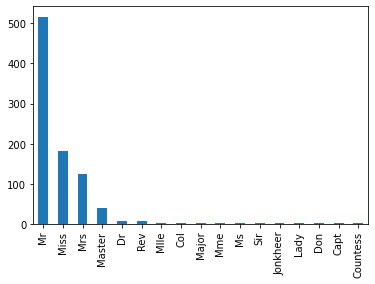

In [1169]:
# Se observa gráficamente la distribución de valores de la nueva variable 'Title'
df['Title'].value_counts().plot(kind='bar')

In [1170]:
# Distribución numérica de los títulos
# Se observa que muchos de ellos, a partir de Dr, están poco representados
df['Title'].value_counts()

Mr          517
Miss        182
Mrs         125
Master       40
Dr            7
Rev           6
Mlle          2
Col           2
Major         2
Mme           1
Ms            1
Sir           1
Jonkheer      1
Lady          1
Don           1
Capt          1
Countess      1
Name: Title, dtype: int64

In [1171]:
# Se observa la edad media de las personas con cada título
# Se observa que 'Master'(Maestro) por la edad media se refiere a niños
means = df.groupby('Title')['Age'].mean()
means

Title
Capt        70.000000
Col         58.000000
Countess    33.000000
Don         40.000000
Dr          42.000000
Jonkheer    38.000000
Lady        48.000000
Major       48.500000
Master       4.574167
Miss        21.773973
Mlle        24.000000
Mme         24.000000
Mr          32.368090
Mrs         35.898148
Ms          28.000000
Rev         43.166667
Sir         49.000000
Name: Age, dtype: float64

In [1172]:
# Se confirma que se trata de niños de 0 a 12 años
kids = df[df['Title'] == 'Master']
kids['Age']

7       2.00
16      2.00
50      7.00
59     11.00
63      4.00
65       NaN
78      0.83
125    12.00
159      NaN
164     1.00
165     9.00
171     4.00
176      NaN
182     9.00
183     1.00
193     3.00
261     3.00
278     7.00
305     0.92
340     2.00
348     3.00
386     1.00
407     3.00
445     4.00
480     9.00
489     9.00
549     8.00
709      NaN
751     6.00
755     0.67
787     8.00
788     1.00
802    11.00
803     0.42
819    10.00
824     2.00
827     1.00
831     0.83
850     4.00
869     4.00
Name: Age, dtype: float64

### Cantidad de valores de una variable contínua específica

<AxesSubplot:>

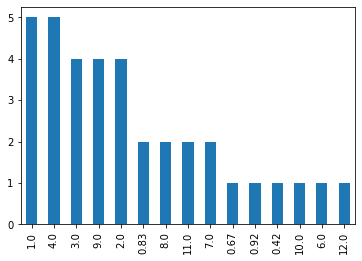

In [1173]:
# Se muestra gráficamente cómo se agrupan
kids['Age'].value_counts().plot(kind='bar')

### Cantidad de valores de una variable discreta con 2 condiciones 
('Sex'=='Female' y 'Title')

<AxesSubplot:>

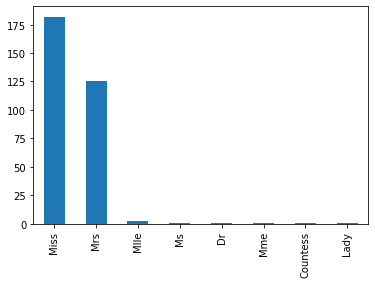

In [1174]:
# Se muestran los grupos que componen las personas de sexo femenino 
female = df[df['Sex'] == 'female']
female['Title'].value_counts().plot(kind='bar')

### Cantidad de valores de una variable discreta con 2 condiciones 
('Sex'=='Male' y 'Title')

<AxesSubplot:>

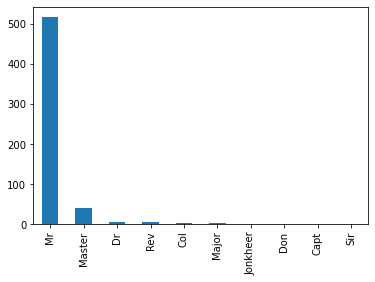

In [1175]:
# Se muestran los grupos que componen las personas de sexo masculino 
males = df[df['Sex'] == 'male']
males['Title'].value_counts().plot(kind='bar')

In [1176]:
# Con la prueba anterior se observa que Dr incluye male y female, se agrupa en base a ello
df['Title'] = np.where((df['Title'] == 'Dr') & (df['Sex'] == 'female') , 'Mrs', df['Title'])
df['Title'] = np.where((df['Title'] == 'Dr') & (df['Sex'] == 'male') , 'Mr', df['Title'])

In [1177]:
# Se observa la proporción de pasajeros male y female
df['Sex'].value_counts()

male      577
female    314
Name: Sex, dtype: int64

In [1178]:
# Se observa que ya no exite el grupo Dr
df['Title'].value_counts()

Mr          523
Miss        182
Mrs         126
Master       40
Rev           6
Mlle          2
Col           2
Major         2
Capt          1
Sir           1
Mme           1
Ms            1
Jonkheer      1
Lady          1
Don           1
Countess      1
Name: Title, dtype: int64

In [1179]:
# Changing to common category
# Se agrupa el resto de categorías a excepción de Master que se cambia por Kid
df['Title'] = df['Title'].replace(['Rev','Col','Major','Sir','Jonkheer','Capt','Don'], 'Mr')
df['Title'] = df['Title'].replace('Master', 'Kid')
df['Title'] = df['Title'].replace(['Mme','Lady','Countess'], 'Mrs')
df['Title'] = df['Title'].replace(['Mlle','Ms'], 'Miss')

In [1180]:
# Se observa el resultado de la agrupación
df['Title'].value_counts()

Mr      537
Miss    185
Mrs     129
Kid      40
Name: Title, dtype: int64

<AxesSubplot:>

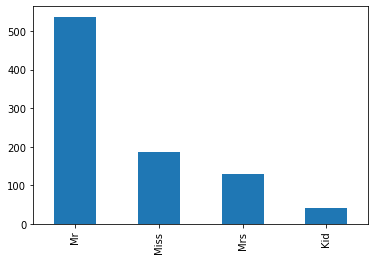

In [1181]:
# Se muestran gráficamente las nuevas agrupaciones
df['Title'].value_counts().plot(kind='bar')

In [1182]:
# Extraída la información relevante, se eliminan las variables 'Cabin' y 'Name' 
df.drop(['Cabin','Name'], 1, inplace=True) 
df.shape

(891, 10)

In [1183]:
# Se observa que quedan 2 variables con missings
df.isnull().sum()

Survived      0
Pclass        0
Sex           0
Age         177
SibSp         0
Parch         0
Fare          0
Embarked      2
Deck          0
Title         0
dtype: int64

In [1184]:
# Se muestra la distribución por categoría, incialmente parece una variable poco relevante
df['Deck'].value_counts()

Unknown    687
C           59
B           47
D           33
E           32
A           15
F           13
G            4
T            1
Name: Deck, dtype: int64

In [1185]:
# Se muestra la distribución de valores por categoría
# Se observa que la mayoría de pasajeros han partido de S 
df['Embarked'].value_counts()

S    644
C    168
Q     77
Name: Embarked, dtype: int64

In [1186]:
# OPCIÓN 1: Uso de la moda para cumplimentar MANUALMENTE los missing de la variable 'Embarked' 
# common = 'S'
# df['Embarked']=df['Embarked'].fillna('S')

In [1187]:
# OPCIÓN 2: Uso de la moda para cumplimentar AUTOMÁTICAMENTE los missing de la variable 'Embarked' 
df['Embarked'].fillna(df['Embarked'].mode()[0], inplace = True)
# Confirmación de que no quedan campos missing en la variable 'Embarked'
df['Embarked'].isnull().sum()

0

In [1188]:
# Se extrae la edad media de los diferentes grupos representados
means = df.groupby('Title')['Age'].mean()
means

Title
Kid      4.574167
Miss    21.845638
Mr      32.984412
Mrs     35.991071
Name: Age, dtype: float64

In [1189]:
# Lista de los diferentes títulos
title_list = ['Miss','Mr','Mrs','Kid']

In [1190]:
# función para cargar el valor medio a cada grupo representado
def age_missing_replace(means, dframe, title_list):
    for title in title_list:
        temp = dframe['Title'] == title 
        dframe.loc[temp, 'Age'] = dframe.loc[temp, 'Age'].fillna(means[title]) 

        
age_missing_replace(means, df, title_list)

In [1191]:
# Comprobación de que no quedan campos missing en la variable 'Embarked'
df['Age'].isnull().sum()

0

### Valores missing (todas las variables)

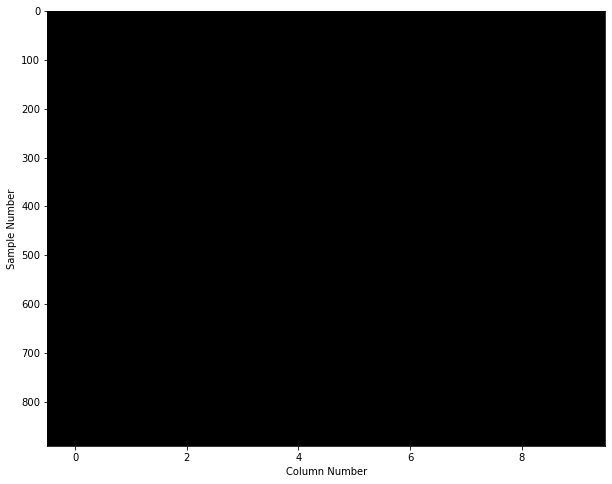

In [1192]:
# librería 1 para comprobar gráficamente los missing del dataset
# se observa que no quedan missings
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 8))
plt.imshow(df.isna(), aspect="auto", interpolation="nearest", cmap="gray")
plt.xlabel("Column Number")
plt.ylabel("Sample Number");

### Valores missing (todas las variables)

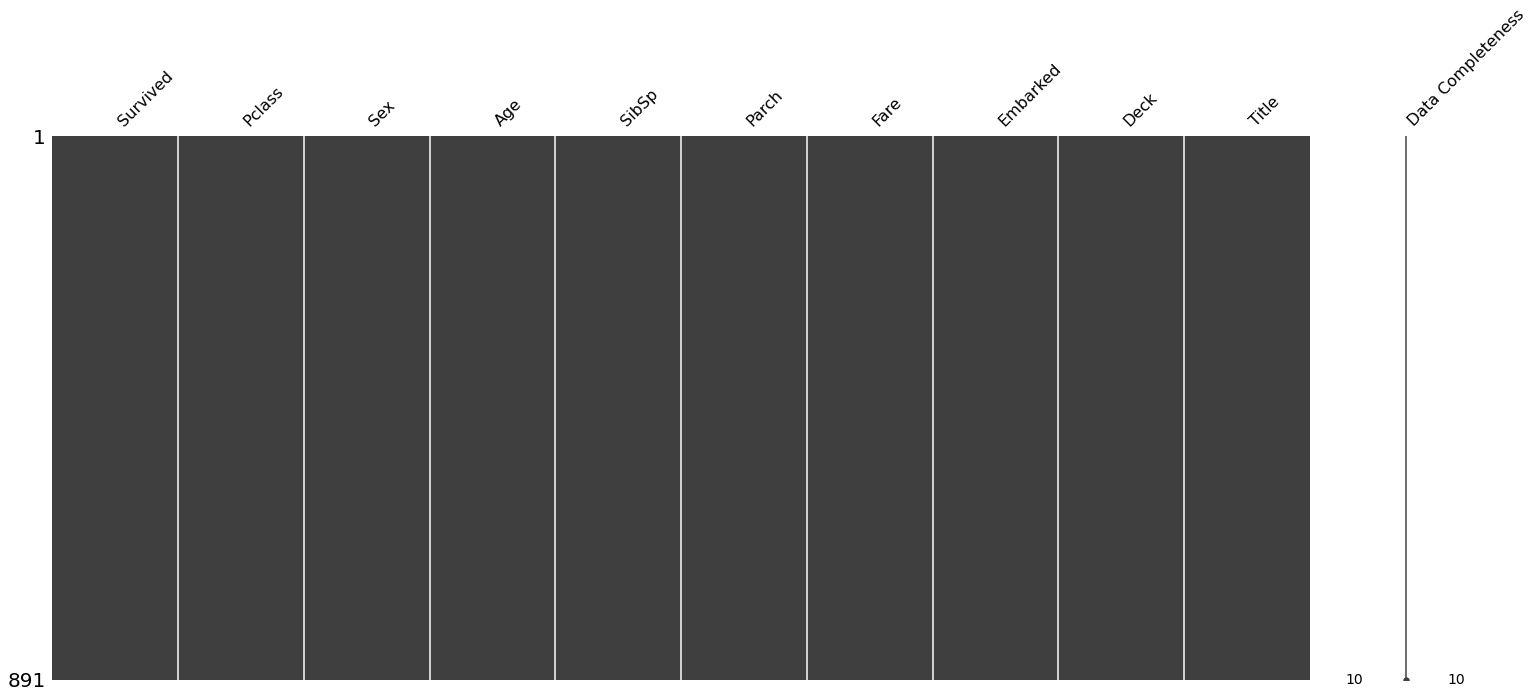

In [1193]:
# librería 2 para comprobar gráficamente los missing del dataset
# se observa que no quedan missings
import missingno as msno
msno.matrix(df, labels=True, sort="descending");

In [1194]:
# Función para eliminar las filas que tienen más de un 20% de valores missing
# axis = 0 : Por fila
df = df.dropna(thresh=df.shape[1] * 0.80, axis=0).reset_index(drop=True)
df.shape

(891, 10)

In [1195]:
# Se observa que no quedan en el dataset valores missing
df.isnull().sum()

Survived    0
Pclass      0
Sex         0
Age         0
SibSp       0
Parch       0
Fare        0
Embarked    0
Deck        0
Title       0
dtype: int64

### 2.2.2. Per Feature

### Valores missing (todas las variables), de menor a mayor

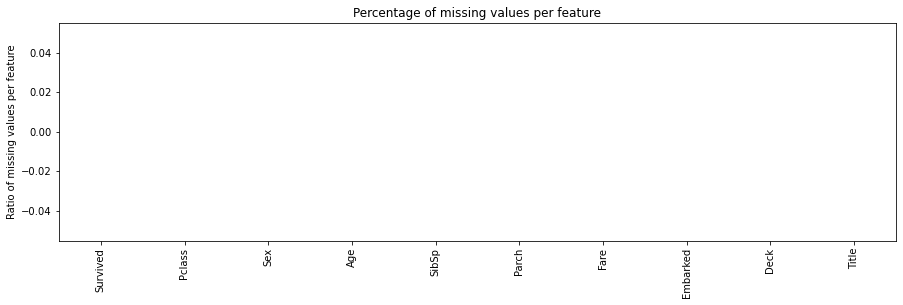

In [1196]:
# Muestra el ratio de valores missing por variable
df.isna().mean().sort_values().plot(
    kind="bar", figsize=(15, 4),
    title="Percentage of missing values per feature",
    ylabel="Ratio of missing values per feature");

In [1197]:
# Función para eliminar las filas que tienen más de un 15% de valores missing
# axis = 1 : Por columna
df = df.dropna(thresh=df.shape[0] * 0.85, axis=1)
df.shape

(891, 10)

In [1198]:
# Se observa que no quedan en el dataset valores missing
df.isnull().sum()

Survived    0
Pclass      0
Sex         0
Age         0
SibSp       0
Parch       0
Fare        0
Embarked    0
Deck        0
Title       0
dtype: int64

In [1199]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 10 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  891 non-null    int64  
 1   Pclass    891 non-null    int64  
 2   Sex       891 non-null    object 
 3   Age       891 non-null    float64
 4   SibSp     891 non-null    int64  
 5   Parch     891 non-null    int64  
 6   Fare      891 non-null    float64
 7   Embarked  891 non-null    object 
 8   Deck      891 non-null    object 
 9   Title     891 non-null    object 
dtypes: float64(2), int64(4), object(4)
memory usage: 69.7+ KB


### 2.2.3. Small side note

z

### 2.3. Unwanted entries and recording errors

### 2.3.1. Numerical features

### Comprobación entradas no deseadas variables numéricas

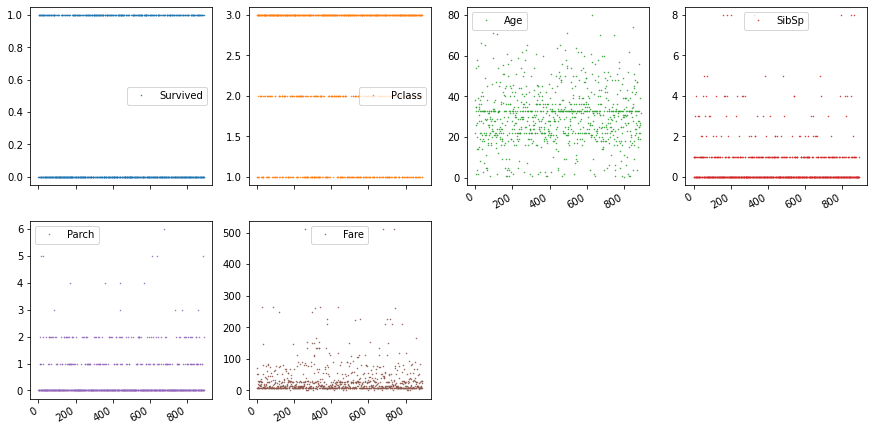

In [1200]:
# Función que muestra si hay entradas no deseadas o errores de carga extrañas
df.plot(lw=0,
        marker=".",
        subplots=True,
        layout=(-1, 4),
        figsize=(15, 8),
        markersize=1);

### 2.3.2. Non-numerical features

In [1201]:
# Se observa que ya no hay una gran dispersión de valores
df.describe(exclude=["number"])

,Sex,Embarked,Deck,Title
count,891,891,891,891
unique,2,3,9,4
top,male,S,Unknown,Mr
freq,577,646,687,537


### Distribución de valores variables categóricas
(luego de transformación de variables y tratamiento de missings)

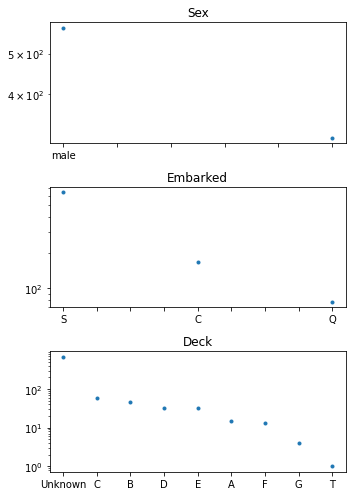

In [1202]:
# Se muestran gráficamente la cantidad de valores por característica

# Create figure object with 3 subplots
fig, axes = plt.subplots(ncols=1, nrows=3, figsize=(5, 7))

# Identify non-numerical features
df_non_numerical = df.select_dtypes(exclude=["number"])

# Loop through features and put each subplot on a matplotlib axis object
for col, ax in zip(df_non_numerical.columns, axes.ravel()):

    # Selects one single feature and counts number of unique value
    df_non_numerical[col].value_counts().plot(

        # Plots this information in a figure with log-scaled y-axis
        logy=True, title=col, lw=0, marker=".", ax=ax)
    
plt.tight_layout();

### 2.4. Conclusion of quality investigation

- Se observan valores que no dan información (Deck: muy representados('Unknown') o muy poco representados('T')

## 3. Content Investigation
Una vez entendida la estructura y la calidad del conjunto de datos, se realiza una exploración más profunda de los valores de las características y se observa cómo las diferentes características se relacionan entre sí.

### 3.1. Feature distribution

### Distribución de valores de variables numéricas luego de tratamiento de missings

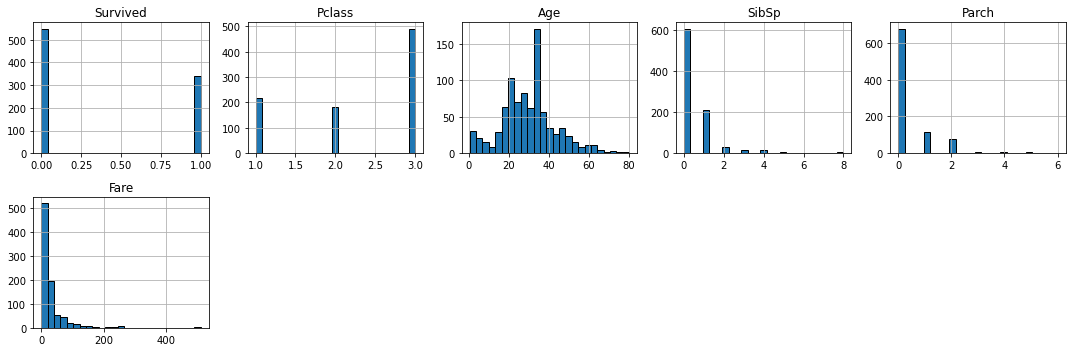

In [1203]:
# Plots the histogram for each numerical feature in a separate subplot
df.hist(bins=25, figsize=(15, 5), layout=(-1, 5), edgecolor="black")
plt.tight_layout();

### % de entrada MÁS Frecuente de cada variable (todas las variables) _ Grado de DESBALANCEO de valores
Algunas características, como Parch en su mayoría contienen entradas de una sola categoría. <br/>
Utilizando el .mode() función, extraemos la relación de la entrada más frecuente para cada función y visualizar esa información. <br/>
Por ejemplo:   Deck: Unknown_687 / Total_891 = 77,1%

Deck        0.771044
Parch       0.760943
Embarked    0.725028
SibSp       0.682379
Sex         0.647587
dtype: float64

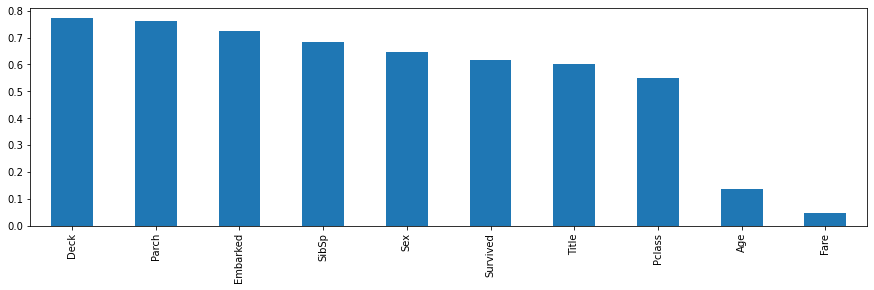

In [1204]:
# Collects for each feature the most frequent entry
most_frequent_entry = df.mode()

# Checks for each entry if it contains the most frequent entry
df_freq = df.eq(most_frequent_entry.values, axis=1)

# Computes the mean of the 'is_most_frequent' occurrence
df_freq = df_freq.mean().sort_values(ascending=False)

# Show the 5 top features with the highest ratio of singular value content
display(df_freq.head())

# Visualize the 'df_freq' table
df_freq.plot.bar(figsize=(15, 4));

### 3.2. Feature patterns
El objetivo de esta parte es doble:
1. Identificar patrones particulares dentro de una característica que nos ayudará a decidir si algunas entradas necesitan ser eliminadas o modificadas
2. Identificar relaciones particulares entre características que nos ayudarán a comprender mejor nuestro conjunto de datos

In [1205]:
df.columns

Index(['Survived', 'Pclass', 'Sex', 'Age', 'SibSp', 'Parch', 'Fare',
       'Embarked', 'Deck', 'Title'],
      dtype='object')

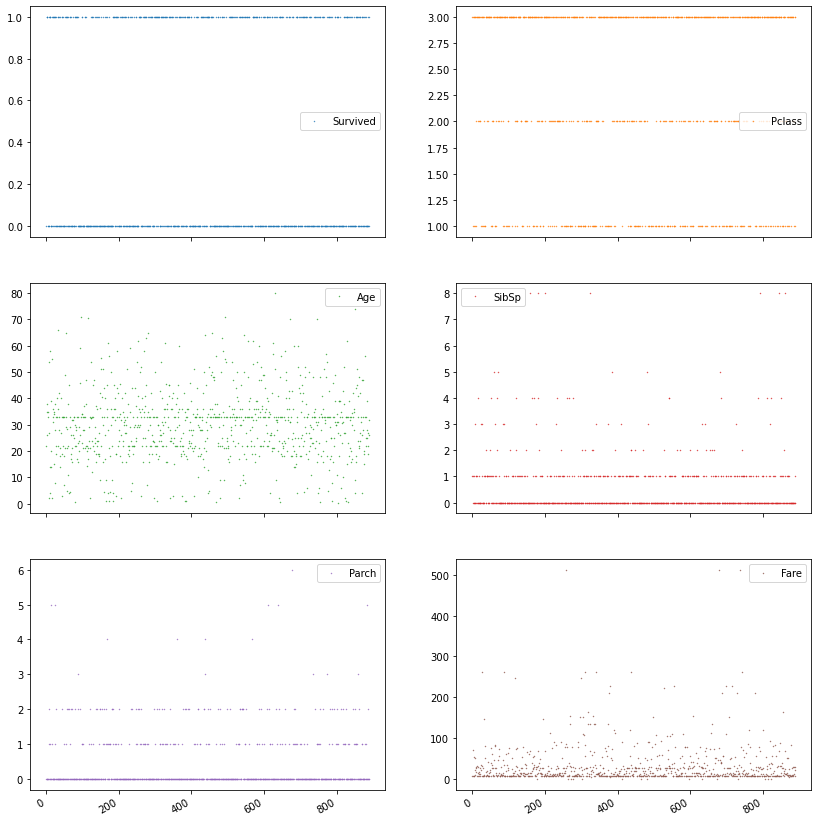

In [1219]:
df[['Survived', 'Pclass', 'Sex', 'Age','SibSp','Parch','Fare',
       'Embarked', 'Deck', 'Title']].plot(
    lw=0, marker=".", subplots=True, layout=(-1, 2),
    markersize=0.8, figsize=(14, 16));

In [1207]:
# Creates mask to identify numerical features with at least 25 unique features
cols_continuous = df.select_dtypes(include="number").nunique() >= 25

### 3.2.1. Continuous features

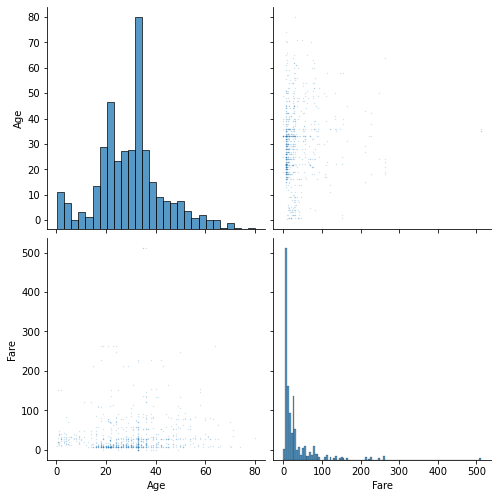

In [1208]:
# Create a new dataframe which only contains the continuous features
df_continuous = df[cols_continuous[cols_continuous].index]
df_continuous.shape


import seaborn as sns

sns.pairplot(df_continuous, height=3.5,
             plot_kws={"s": 2, "alpha": 0.2});

In [1226]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 10 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  891 non-null    int64  
 1   Pclass    891 non-null    int64  
 2   Sex       891 non-null    object 
 3   Age       891 non-null    float64
 4   SibSp     891 non-null    int64  
 5   Parch     891 non-null    int64  
 6   Fare      891 non-null    float64
 7   Embarked  891 non-null    object 
 8   Deck      891 non-null    object 
 9   Title     891 non-null    object 
dtypes: float64(2), int64(4), object(4)
memory usage: 69.7+ KB


In [1209]:
df.columns

Index(['Survived', 'Pclass', 'Sex', 'Age', 'SibSp', 'Parch', 'Fare',
       'Embarked', 'Deck', 'Title'],
      dtype='object')

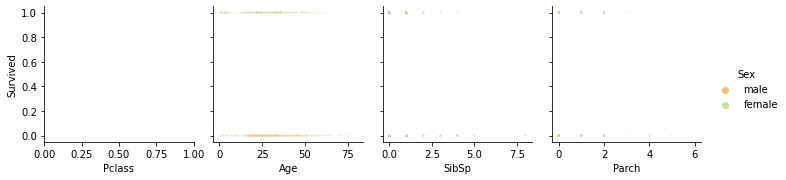

In [1210]:
sns.pairplot(
    df,
    plot_kws={"s": 3, "alpha": 0.2},
    hue='Sex',
    palette="Spectral",
    x_vars=['Pclass','Age', 'SibSp', 'Parch'],
    y_vars="Survived");

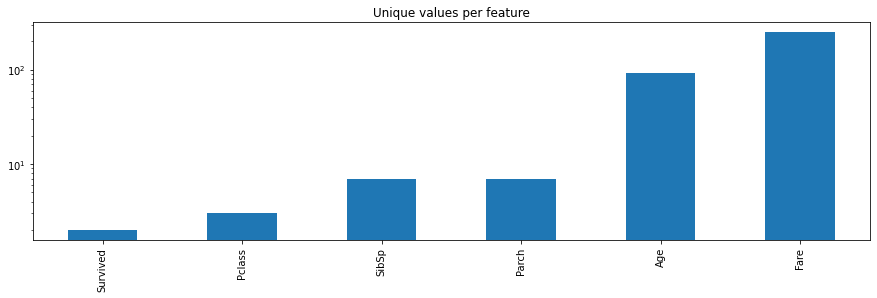

In [1211]:
# For each numerical feature compute number of unique entries
unique_values = df.select_dtypes(include="number").nunique().sort_values()

# Plot information with y-axis in log-scale
unique_values.plot.bar(logy=True, figsize=(15, 4),title="Unique values per feature");

### 3.2.2. Discrete and ordinal features

In [1212]:
# Create a new dataframe which doesn't contain continuous features
df_discrete = df[cols_continuous[~cols_continuous].index]
df_discrete.shape

(891, 4)

### Comprobación NO NA's

In [1213]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 10 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  891 non-null    int64  
 1   Pclass    891 non-null    int64  
 2   Sex       891 non-null    object 
 3   Age       891 non-null    float64
 4   SibSp     891 non-null    int64  
 5   Parch     891 non-null    int64  
 6   Fare      891 non-null    float64
 7   Embarked  891 non-null    object 
 8   Deck      891 non-null    object 
 9   Title     891 non-null    object 
dtypes: float64(2), int64(4), object(4)
memory usage: 69.7+ KB


### Variables después de tratamiento de datos
1. Survived: Codificada como 0 (no) y 1 (si).  TARGET VARIABLE
2. Pclass: CATEGORICAL to NUMERICAL 1, 2 o 3.
3. Sex: CATEGORICAL to NUMERICAL 0:male - 1:female
4. Age: edad del pasajero. NUMERICAL 
5. SibSp: NUMERICAL
6. Parch: NUMERICAL
7. Fare: Precio pagado por el billete - NUMERICAL
8. Embarked: From CATEGORICAL to NUMERICAL
9. Deck: CATEGORICAL
10. Title: CATEGORICAL

In [1214]:
df.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Deck,Title
0,0,3,male,22.0,1,0,7.2500,S,Unknown,Mr
1,1,1,female,38.0,1,0,71.2833,C,C,Mrs
2,1,3,female,26.0,0,0,7.9250,S,Unknown,Miss
3,1,1,female,35.0,1,0,53.1000,S,C,Mrs
4,0,3,male,35.0,0,0,8.0500,S,Unknown,Mr


In [1215]:
df.to_csv('titanic_eda.csv', sep='\t')